All source code, data preprocessing, visualizations, and model implementation are available on GitHub:
🔗 https://github.com/veragustavo119/Assignment

## 📥 Load Dataset
This section loads the Algerian forest fires dataset and displays the first few rows.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io
import numpy as np

In [11]:
# Load the Excel file
df = pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')


## 🧹 Data Cleaning
Check and remove any missing values, duplicates, and set correct data types.


In [5]:
print(f"Find the schema and overview of the dataset to familiarize with it using df.head():\n{df.head().to_string()}")


Find the schema and overview of the dataset to familiarize with it using df.head():
   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI      Classes  Region
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5  not fire          0
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4  not fire          0
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1  not fire          0
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0  not fire          0
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5  not fire          0


In [6]:
print(f"Summary statistics of the dataset using df.describe():\n{df.describe().to_string()}")

Summary statistics of the dataset using df.describe():
              day       month    year  Temperature          RH          Ws        Rain        FFMC         DMC          DC         ISI         BUI         FWI      Region
count  243.000000  243.000000   243.0   243.000000  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000
mean    15.761317    7.502058  2012.0    32.152263   62.041152   15.493827    0.762963   77.842387   14.680658   49.430864    4.742387   16.690535    7.035391    0.497942
std      8.842552    1.114793     0.0     3.628039   14.828160    2.811385    2.003207   14.349641   12.393040   47.665606    4.154234   14.228421    7.440568    0.501028
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000    0.000000   28.600000    0.700000    6.900000    0.000000    1.100000    0.000000    0.000000
25%      8.000000    7.000000  2012.0    30.000000   52.500000   14.000000    0.000000   7

In [13]:
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()
buffer.close()

print(f"Schema and info of the dataset\n{info_str}")


Schema and info of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB



In [14]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Example: Fill or drop
df = df.dropna(subset=['FWI'])  # drop rows missing Fire Weather Index


Missing values:
 day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [19]:
# Drop duplicates if any
df = df.drop_duplicates()


## 🔧 Feature Engineering
Add a binary flag for rain presence to explore its relationship with FWI.


In [20]:
# Ensure data types are correct
df['Region'] = df['Region'].astype('category')
df['Classes'] = df['Classes'].astype('category')

In [29]:
# Optional Feature: Rain = 0 or > 0 binary flag
#df_model['rain_flag'] = df['Rain'].apply(lambda x: 1 if x > 0 else 0)
df['Rain'].apply(lambda x: 0 if x == 0 else 1)


,Rain
0,0
1,1
2,1
3,1
4,0
...,...
238,0
239,1
240,1
241,1


In [33]:
#df_model['rain_flag'] = df['Rain'].apply(lambda x: 0 if x == 0 else 1)
df_model = df.copy()
df_model['rain_flag'] = df['Rain'].apply(lambda x: 1 if x > 0 else 0)


## 📊 Exploratory Data Analysis
Visualize relationships between features and identify key patterns using scatter plots and heatmaps.


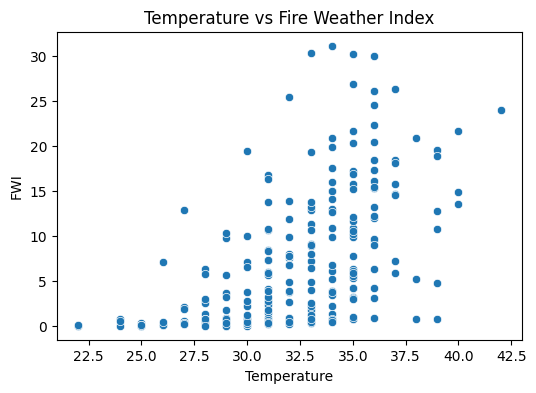

In [35]:
# FWI vs Temperature
plt.figure(figsize=(6,4))
sns.scatterplot(x='Temperature', y='FWI', data=df_model)
plt.title('Temperature vs Fire Weather Index')
plt.show()




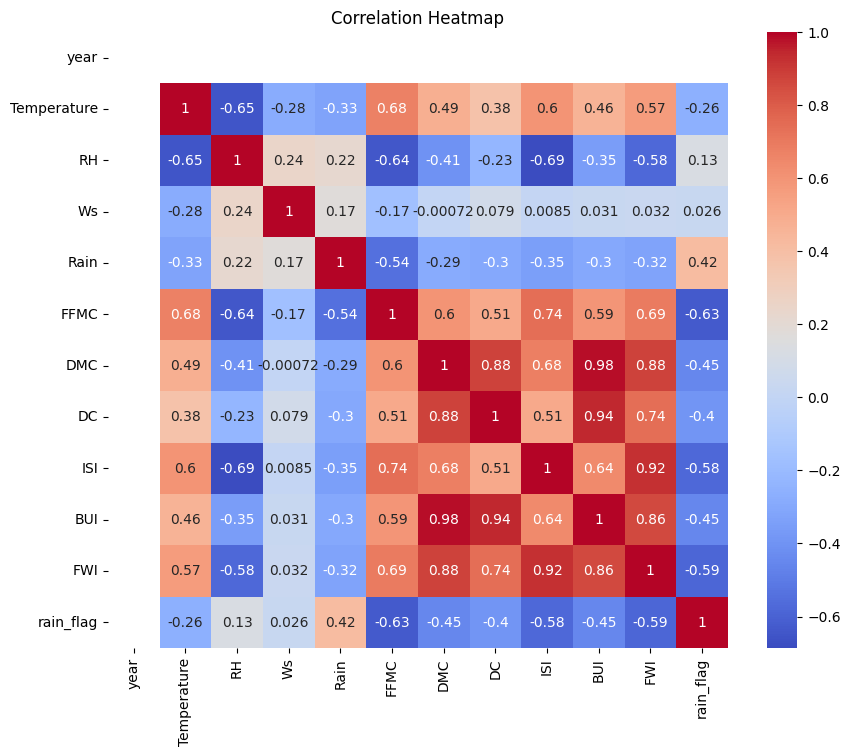

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns before computing correlation
numeric_df = df_model.select_dtypes(include='number')

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## 🧠 Linear Regression Model
Train and evaluate a simple linear regression model to predict FWI.


In [41]:
from sklearn.model_selection import train_test_split

X = df_model.drop(columns=['FWI'])
y = df_model['FWI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Make sure X contains only numeric features
X = df_model.select_dtypes(include='number').drop(columns=['FWI'])

# Define the target again (FWI)
y = df_model['FWI']


In [47]:
print(X_train.dtypes)

year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
rain_flag        int64
dtype: object


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.40529508847332024
R² Score: 0.9866276411461063


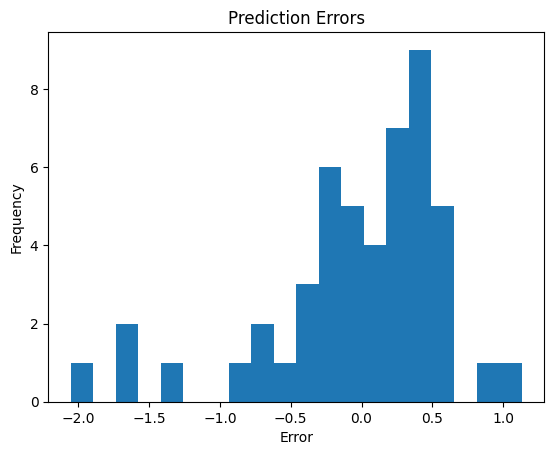

In [48]:
# Example analysis: prediction error histogram
errors = y_test - y_pred
plt.hist(errors, bins=20)
plt.title("Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


## 🧪 Regularization: Ridge and Lasso Regression
Apply Ridge and Lasso regression with cross-validation and compare their performance.


In [49]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, KFold

ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, ridge_params, cv=KFold(n_splits=5), scoring='neg_mean_squared_error')
grid_ridge.fit(X_train, y_train)
print("Best Ridge alpha:", grid_ridge.best_params_)


Best Ridge alpha: {'alpha': 10}


In [50]:
# Lasso (L1 regularization)
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, ridge_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

print("Best Lasso alpha:", lasso_grid.best_params_)


Best Lasso alpha: {'alpha': 0.1}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.042e+01, tolerance: 9.104e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+00, tolerance: 1.013e+00
  model = cd_fast.enet_coordinate_descent(
